In [17]:
####Load the libraries####
import numpy as np
import matplotlib.pyplot as plt

In [18]:
####Utility functions####
def muU(mu_lambd,mu_X,sigm_lambd,sigm_X,rho):
    #
    #This function computes the mu^{U}
    #
    #INPUTS: - mu_lambd: drift of the transactions' intensity process
    #        - mu_X: drift of the exchange rate process
    #        - sigm_lambd: volatility of the transactions' intensity process
    #        - sigm_X: volatility of the exchange rate process
    #        - rho: correlation between transactions' intensity and exchange rate
    #
    #OUTPUT: - value of mu^{U}
    #
    
    return(mu_lambd+mu_X+sigm_lambd*sigm_X*rho)

def sigmU(sigm_lambd,sigm_X,rho):
    #
    #This function computes the sigma^{U}
    #
    #INPUTS: - sigm_lambd: volatility of the transactions' intensity process
    #        - sigm_X: volatility of the exchange rate process
    #        - rho: correlation between transactions' intensity and exchange rate
    #
    #OUTPUT: - value of sigma^{U}
    #

    
    return(np.sqrt(sigm_lambd**2+sigm_X**2+2*sigm_lambd*sigm_X*rho))

def calcmoments(muSc,sigmSc,t):
    #
    #This function computes the moments of the distribution of U(t)
    #
    #INPUTS: - muSc: mu^{U} value
    #        - sigmSc: sigma^{U} value
    #        - t: time value
    #
    #OUTPUT: - list containing the values of mean, variance, skewness, and kurtosis
    #
    
    mmean = []
    vvariance = []
    sskewness = []
    kkurtosis = []
    for i in range(len(muSc)):
        mu = (muSc[i]-0.5*(sigmSc[i])**2)*t
        sigma = sigmScOne[i]*np.sqrt(t)
        mean = np.exp(mu+(sigma**2)/2)
        mmean.append(mean)
        variance = (np.exp(sigma**2)-1)*np.exp(2*mean+sigma**2)
        vvariance.append(variance)
        skewness = (np.exp(sigma**2)+2)*np.sqrt(np.exp(sigma**2)-1)
        sskewness.append(skewness)
        kurtosis = np.exp(4*sigma**2)+2*np.exp(3*sigma**2)+3*np.exp(2*sigma**2)-6
        kkurtosis.append(kurtosis)
        
    return([mmean,vvariance,sskewness,kkurtosis])

In [19]:
#Define grid for the correlation between transactions' intensity and exchange rate
rhoGrid = [-1, -0.5, 0, 0.5, 1]

In [20]:
### Scenario I###

#Compute mu^{U} and sigma^{U} for each value of the correlation between transactions' intensity
#and exchange rate
muScOne = []
sigmScOne = []

for rh in rhoGrid:
    
    muScOne.append(muU(mu_lambd = 0, mu_X = 0, sigm_lambd = 0.1, sigm_X = 0.3, rho = rh))
    sigmScOne.append(sigmU(sigm_lambd = 0.1, sigm_X = 0.3, rho = rh))

In [21]:
### Scenario II###

#Compute mu^{U} and sigma^{U} for each value of the correlation between transactions' intensity
#and exchange rate
muScTwo = []
sigmScTwo = []

for rh in rhoGrid:
    
    muScTwo.append(muU(mu_lambd = 0.1, mu_X = -0.3, sigm_lambd = 0.1, sigm_X = 0.3, rho = rh))
    sigmScTwo.append(sigmU(sigm_lambd = 0.1, sigm_X = 0.3, rho = rh))

In [22]:
### Scenario III###

#Compute mu^{U} and sigma^{U} for each value of the correlation between transactions' intensity
#and exchange rate
muScThree = []
sigmScThree = []

for rh in rhoGrid:
    
    muScThree.append(muU(mu_lambd = 0.1, mu_X = -0.05, sigm_lambd = 0.1, sigm_X = 0.3, rho = rh))
    sigmScThree.append(sigmU(sigm_lambd = 0.1, sigm_X = 0.3, rho = rh))

In [23]:
### Scenario IV###

#Compute mu^{U} and sigma^{U} for each value of the correlation between transactions' intensity
#and exchange rate
muScFour = []
sigmScFour = []

for rh in rhoGrid:
    
    muScFour.append(muU(mu_lambd = 0, mu_X = -0.3, sigm_lambd = 0.1, sigm_X = 0.3, rho = rh))
    sigmScFour.append(sigmU(sigm_lambd = 0.1, sigm_X = 0.3, rho = rh))

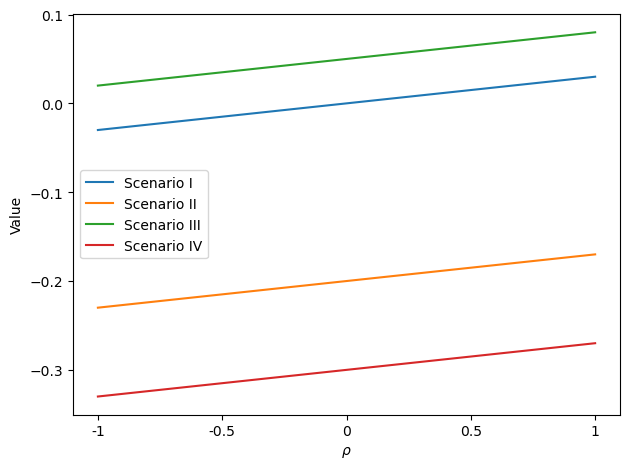

In [24]:
plt.plot(muScOne)
plt.plot(muScTwo)
plt.plot(muScThree)
plt.plot(muScFour)
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('MU.jpg')
plt.show()

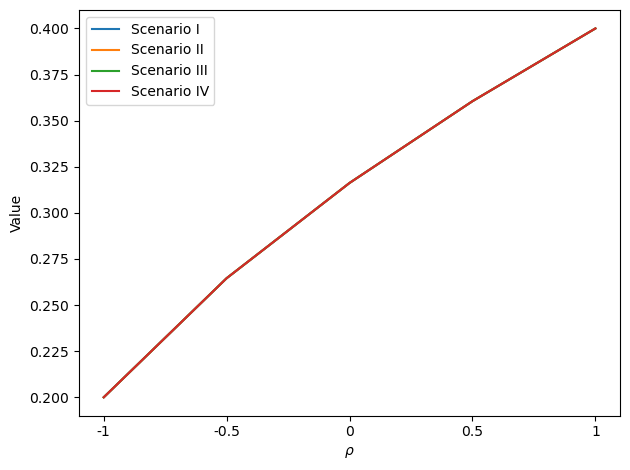

In [25]:
plt.plot(sigmScOne)
plt.plot(sigmScTwo)
plt.plot(sigmScThree)
plt.plot(sigmScFour)
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('Sigma.jpg')
plt.show()

In [26]:
### Scenario I###

#Compute moments of distribution of U(t)
mean_scI = []
variance_scI = []
skewness_scI = []
kurtosis_scI = []

tt = [0.001,1,5]

for t in tt:
    aa = calcmoments(muScOne,sigmScOne,t)
    mean_scI.append(aa[0])
    variance_scI.append(aa[1])
    skewness_scI.append(aa[2])
    kurtosis_scI.append(aa[3])

In [27]:
### Scenario II###

#Compute moments of distribution of U(t)
mean_scII = []
variance_scII = []
skewness_scII = []
kurtosis_scII = []

tt = [0.001,1,5]

for t in tt:
    aa = calcmoments(muScTwo,sigmScTwo,t)
    mean_scII.append(aa[0])
    variance_scII.append(aa[1])
    skewness_scII.append(aa[2])
    kurtosis_scII.append(aa[3])

In [28]:
### Scenario III###

#Compute moments of distribution of U(t)
mean_scIII = []
variance_scIII = []
skewness_scIII = []
kurtosis_scIII = []

tt = [0.001,1,5]

for t in tt:
    aa = calcmoments(muScThree,sigmScThree,t)
    mean_scIII.append(aa[0])
    variance_scIII.append(aa[1])
    skewness_scIII.append(aa[2])
    kurtosis_scIII.append(aa[3])

In [29]:
### Scenario IV###

#Compute moments of distribution of U(t)
mean_scIV = []
variance_scIV = []
skewness_scIV = []
kurtosis_scIV = []

tt = [0.001,1,5]

for t in tt:
    aa = calcmoments(muScFour,sigmScFour,t)
    mean_scIV.append(aa[0])
    variance_scIV.append(aa[1])
    skewness_scIV.append(aa[2])
    kurtosis_scIV.append(aa[3])

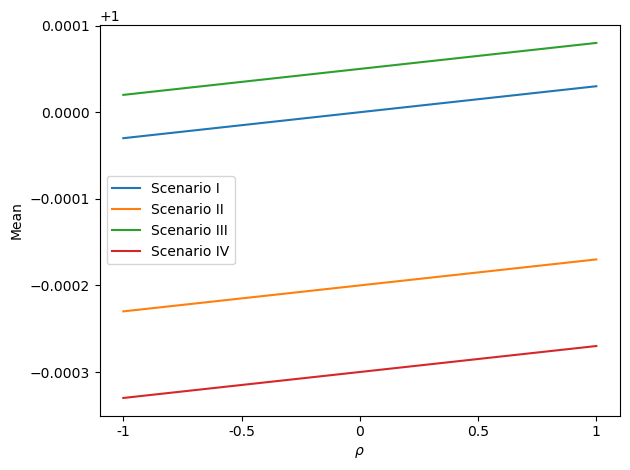

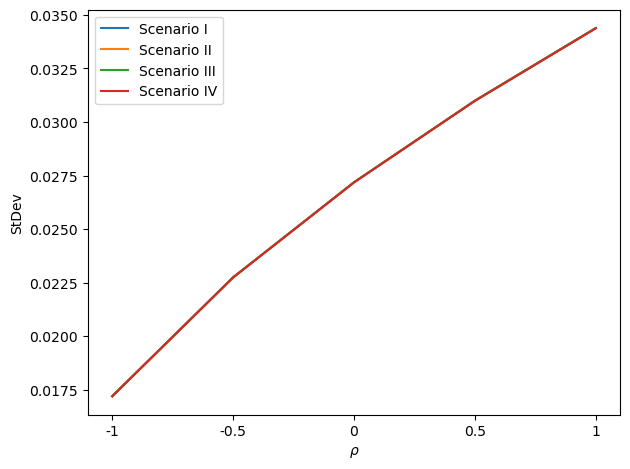

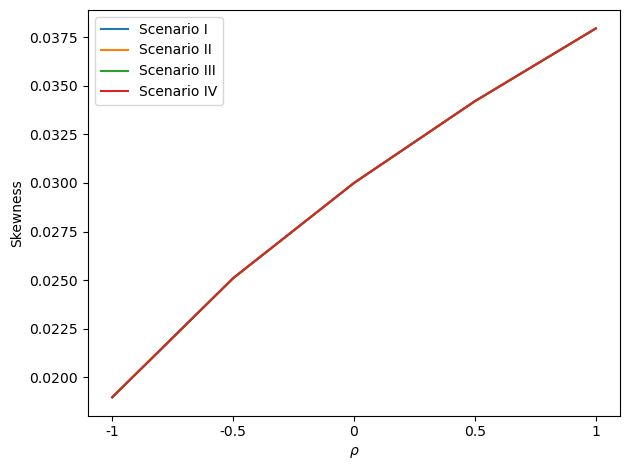

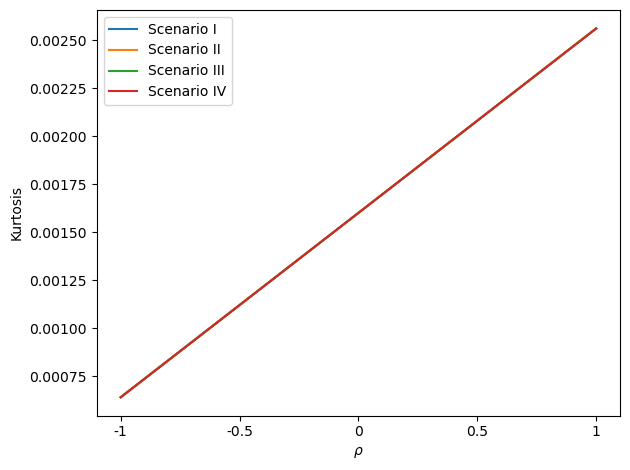

In [30]:
plt.plot(mean_scI[0])
plt.plot(mean_scII[0])
plt.plot(mean_scIII[0])
plt.plot(mean_scIV[0])
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("Mean")
plt.tight_layout()
plt.savefig('UMeanLow.jpg')
plt.show()
plt.plot(np.sqrt(variance_scI[0]))
plt.plot(np.sqrt(variance_scII[0]))
plt.plot(np.sqrt(variance_scIII[0]))
plt.plot(np.sqrt(variance_scIV[0]))
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("StDev")
plt.tight_layout()
plt.savefig('UStDevLow.jpg')
plt.show()
plt.plot(skewness_scI[0])
plt.plot(skewness_scII[0])
plt.plot(skewness_scIII[0])
plt.plot(skewness_scIV[0])
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("Skewness")
plt.tight_layout()
plt.savefig('USkewnsLow.jpg')
plt.show()
plt.plot(kurtosis_scI[0])
plt.plot(kurtosis_scII[0])
plt.plot(kurtosis_scIII[0])
plt.plot(kurtosis_scIV[0])
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("Kurtosis")
plt.tight_layout()
plt.savefig('UKurtLow.jpg')
plt.show()

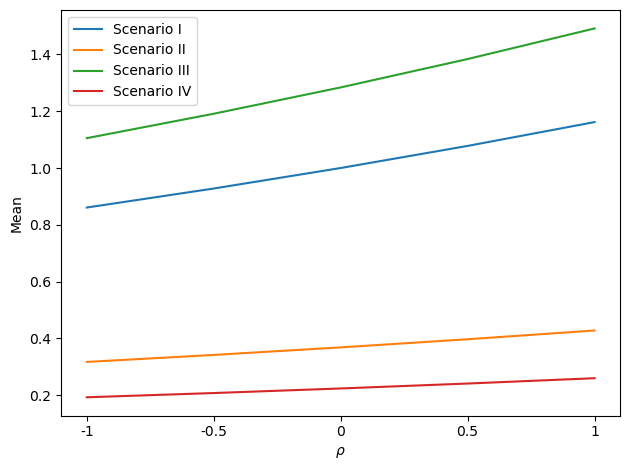

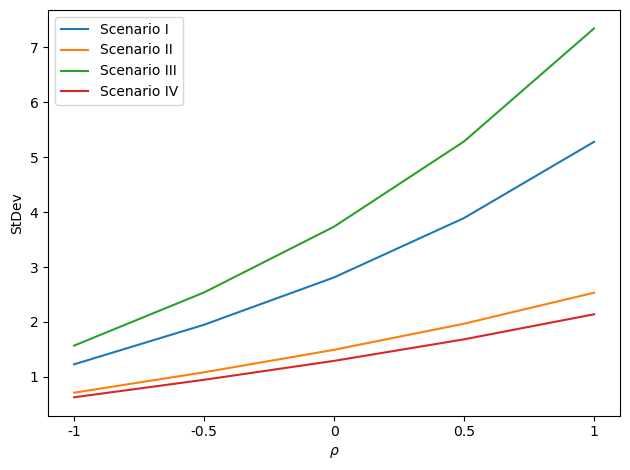

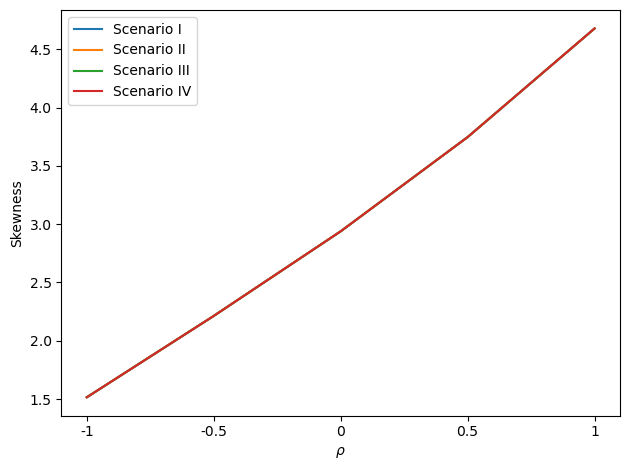

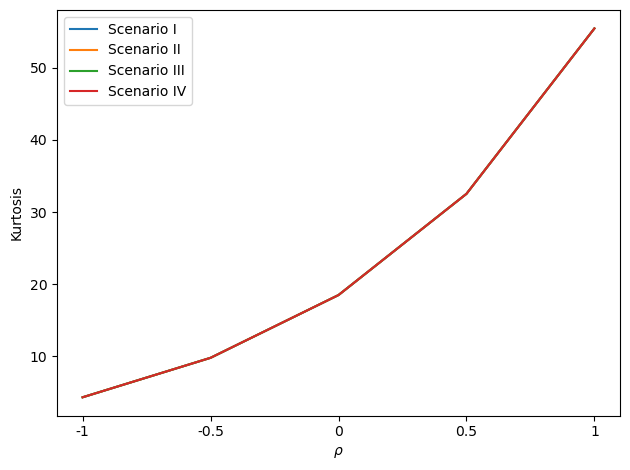

In [31]:
plt.plot(mean_scI[-1])
plt.plot(mean_scII[-1])
plt.plot(mean_scIII[-1])
plt.plot(mean_scIV[-1])
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("Mean")
plt.tight_layout()
plt.savefig('UMeanHigh.jpg')
plt.show()
plt.plot(np.sqrt(variance_scI[-1]))
plt.plot(np.sqrt(variance_scII[-1]))
plt.plot(np.sqrt(variance_scIII[-1]))
plt.plot(np.sqrt(variance_scIV[-1]))
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("StDev")
plt.tight_layout()
plt.savefig('UStDevHigh.jpg')
plt.show()
plt.plot(skewness_scI[-1])
plt.plot(skewness_scII[-1])
plt.plot(skewness_scIII[-1])
plt.plot(skewness_scIV[-1])
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("Skewness")
plt.tight_layout()
plt.savefig('USkewnsHigh.jpg')
plt.show()
plt.plot(kurtosis_scI[-1])
plt.plot(kurtosis_scII[-1])
plt.plot(kurtosis_scIII[-1])
plt.plot(kurtosis_scIV[-1])
plt.legend(['Scenario I','Scenario II','Scenario III','Scenario IV'])
plt.xticks(ticks=[0,1,2,3,4], labels = rhoGrid)
plt.xlabel(r"$\rho$")
plt.ylabel("Kurtosis")
plt.tight_layout()
plt.savefig('UKurtHigh.jpg')
plt.show()